
First five rows of the dataset:
   index  Rank         Game Title Platform    Year     Genre Publisher  \
0      0     1         Wii Sports      Wii  2006.0    Sports  Nintendo   
1      1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo   
2      2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
3      3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
4      4     5             Tetris       GB  1989.0    Puzzle  Nintendo   

   North America  Europe  Japan  Rest of World  Global  Review  
0          40.43   28.39   3.77           8.54   81.12   76.28  
1          29.08    3.58   6.81           0.77   40.24   91.00  
2          14.50   12.22   3.63           3.21   33.55   82.07  
3          14.82   10.51   3.18           3.01   31.52   82.65  
4          23.20    2.26   4.22           0.58   30.26   88.00  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 12 col

C:\Users\pzx12\AppData\Local\Temp\ipykernel_19632\1316274232.py:95: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=norm), label='Title Count')


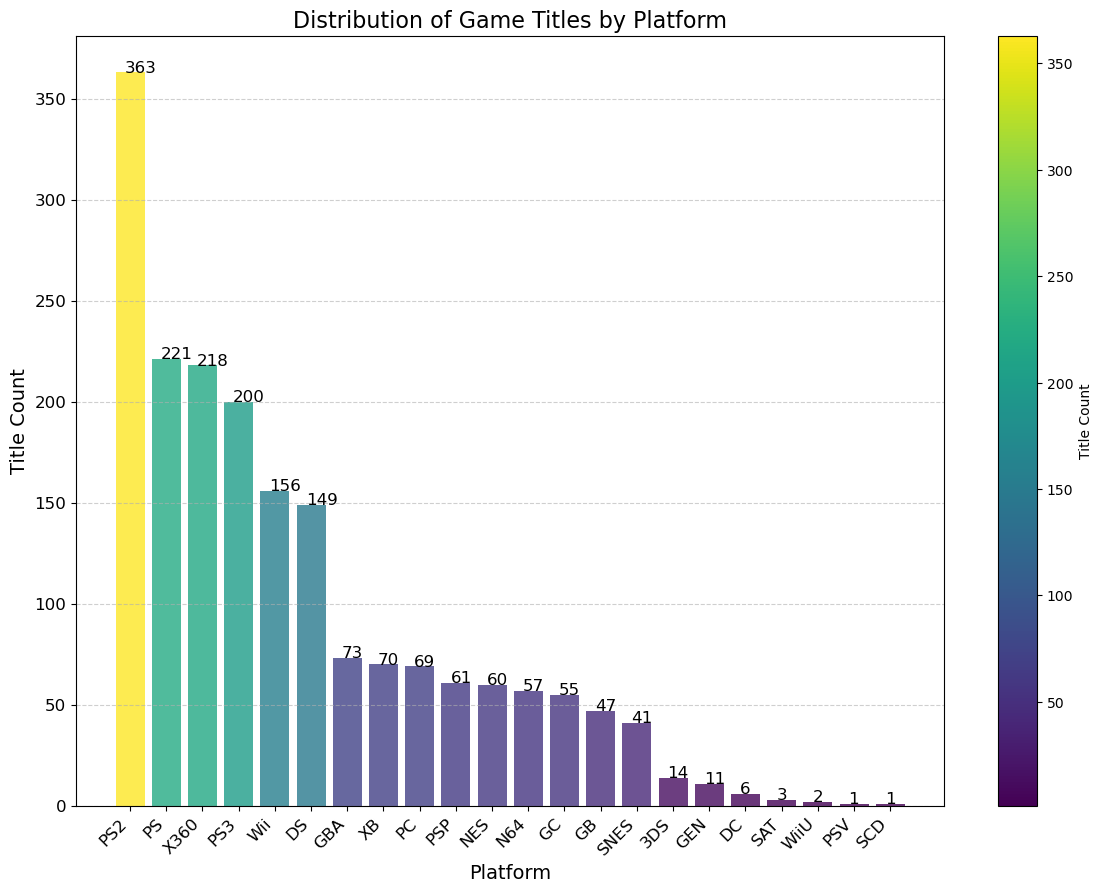

C:\Users\pzx12\AppData\Local\Temp\ipykernel_19632\1316274232.py:127: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(gradient)


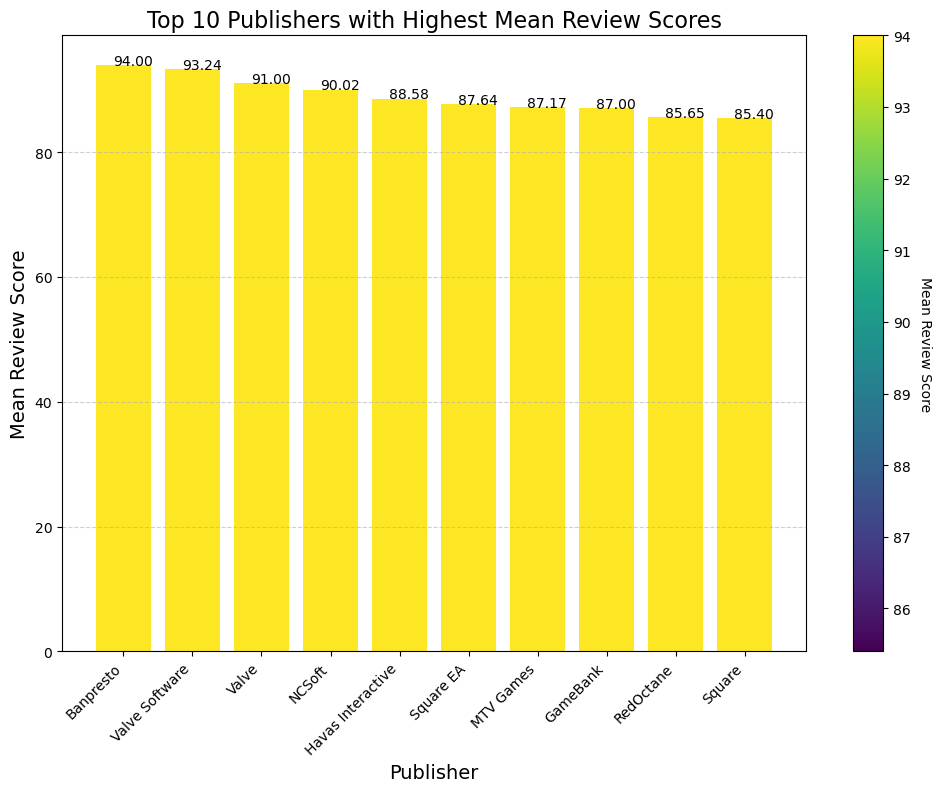

C:\Users\pzx12\AppData\Local\Temp\ipykernel_19632\1316274232.py:153: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(region_sums.index, loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Region', labels=['North America', 'Europe', 'Japan', 'Rest of World'])


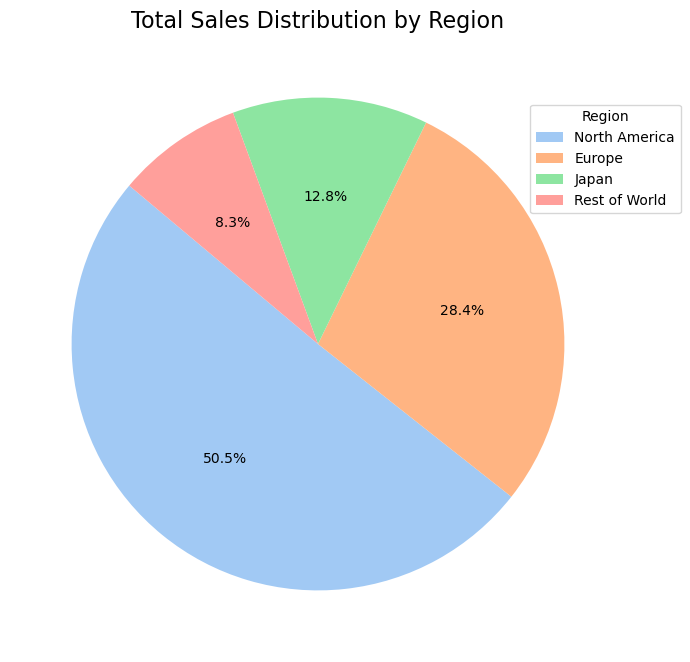

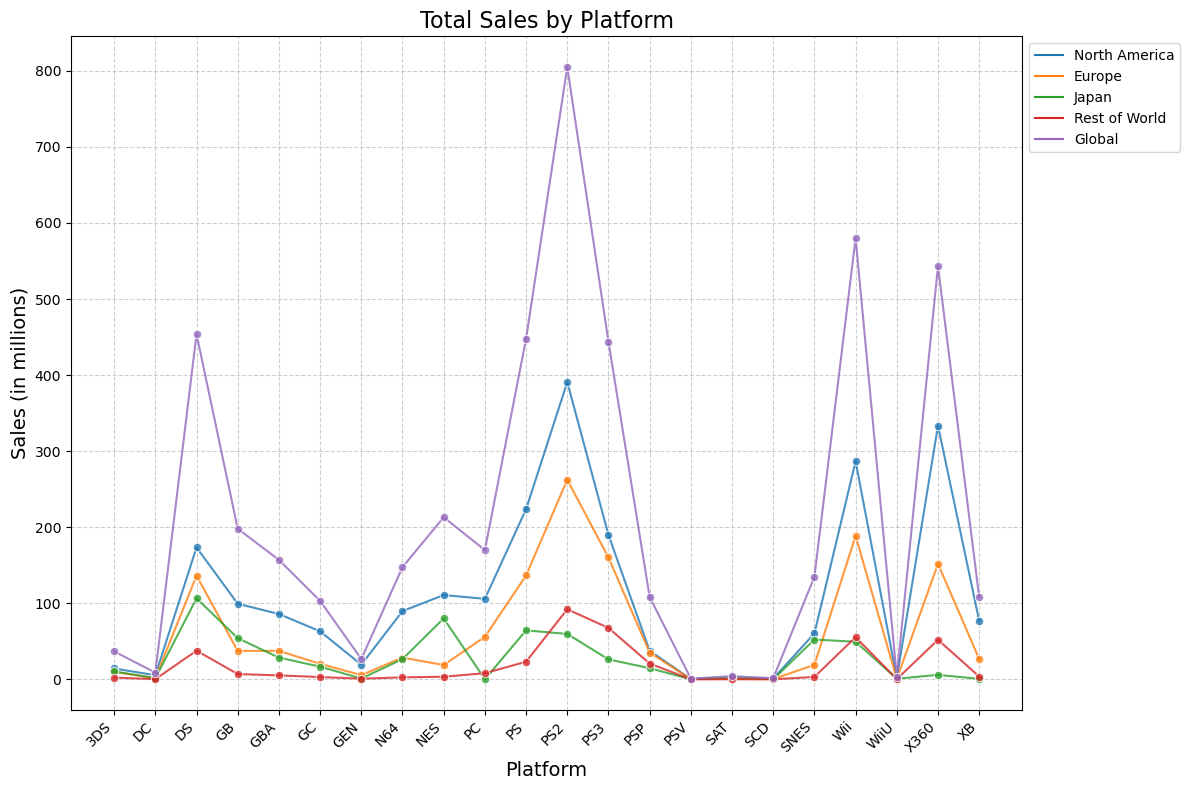

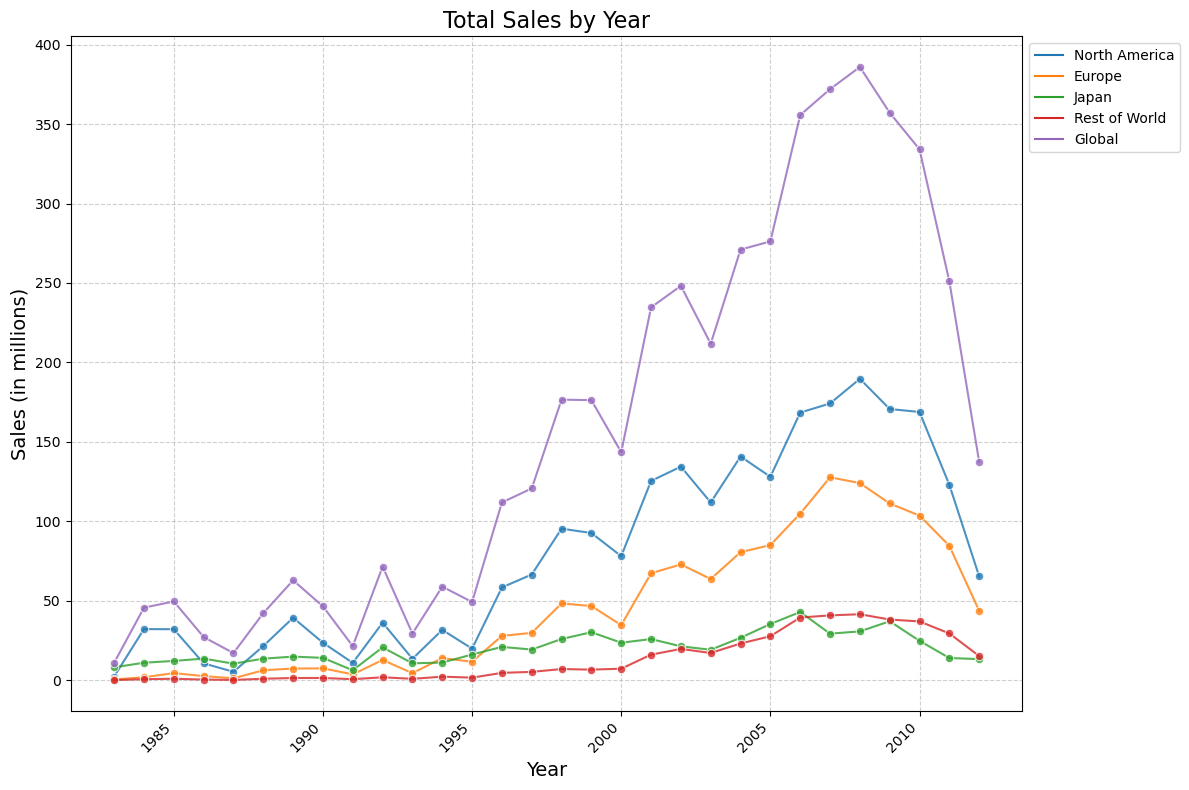

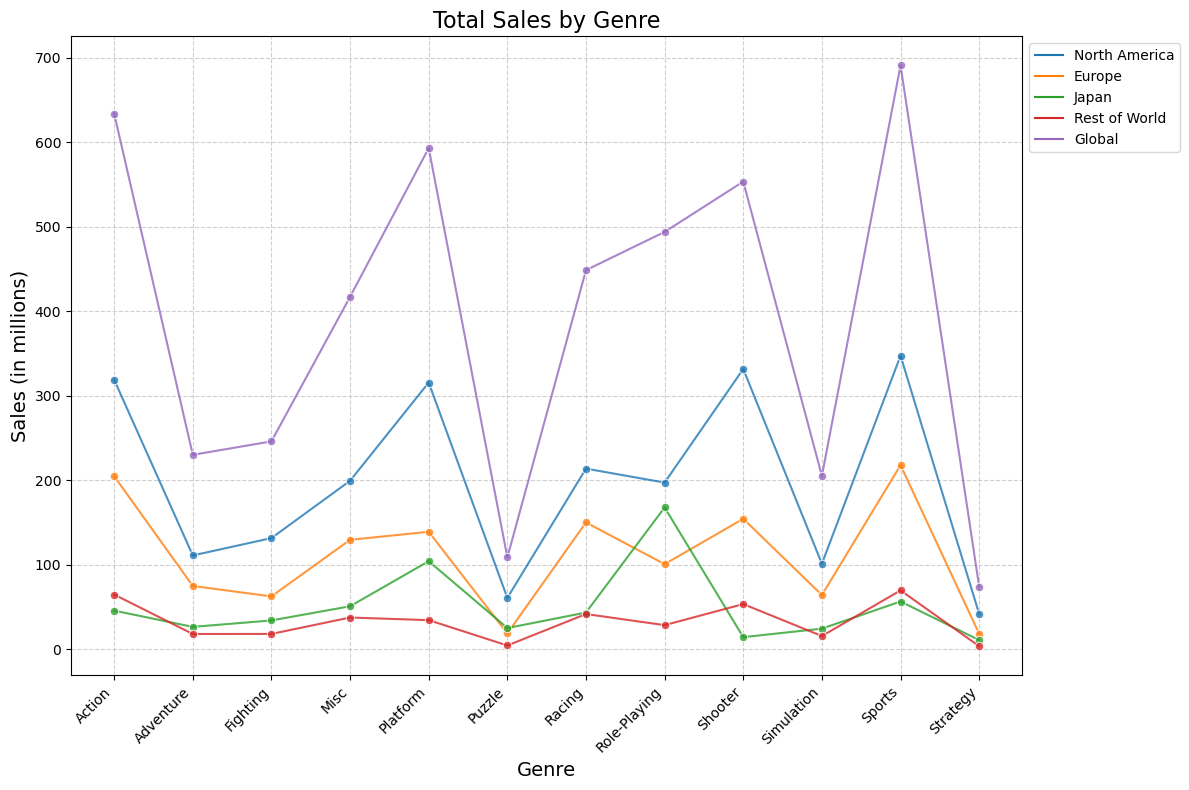

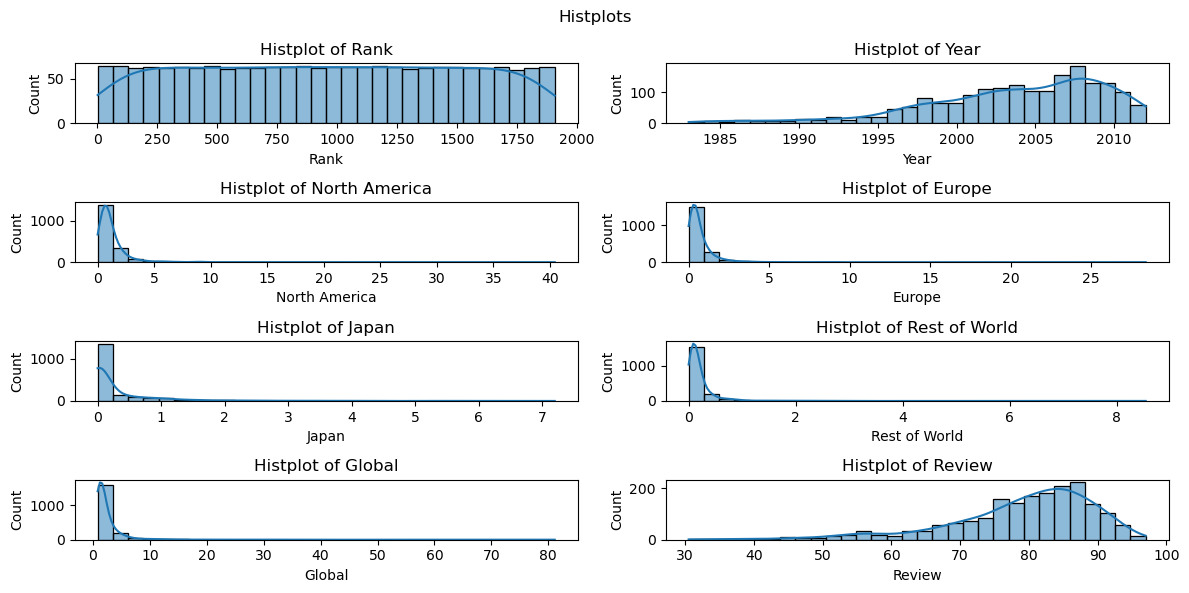

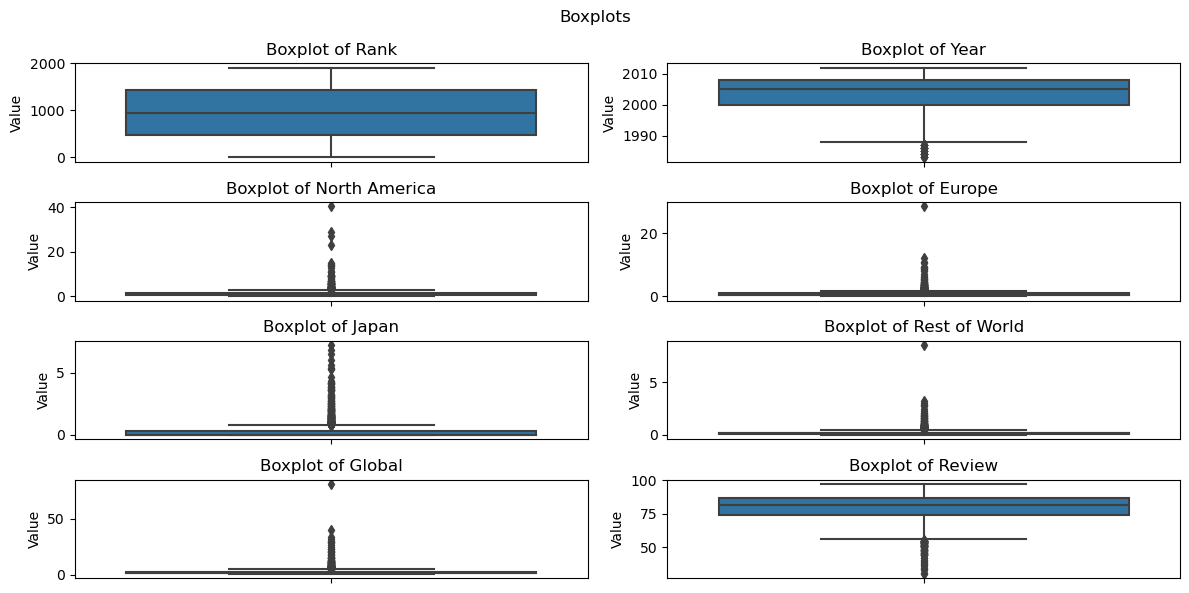

Percentage of outliers in Rank: 0.00%
Percentage of outliers in Year: 2.13%
Percentage of outliers in North America: 7.83%
Percentage of outliers in Europe: 7.99%
Percentage of outliers in Japan: 13.79%
Percentage of outliers in Rest of World: 8.89%
Percentage of outliers in Global: 9.42%
Percentage of outliers in Review: 4.37%


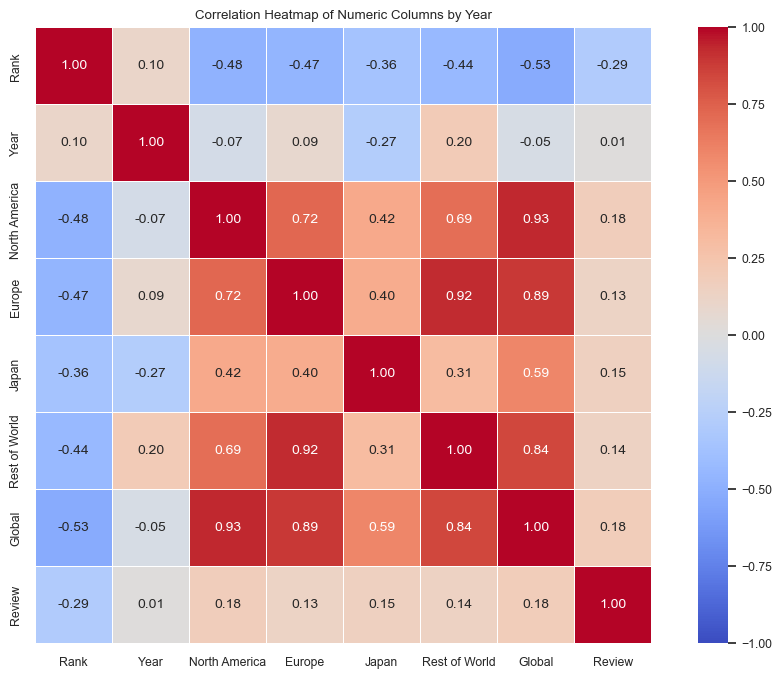

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 30 12:18:49 2024

@author: pzx12
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import skew

# Read the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\pzx12\Video Games Sales.csv")

# Display the first five rows of the dataset
print("\nFirst five rows of the dataset:")
print(df.head())

# Drop the 'index' column
df = df.drop(df.columns[0], axis=1)

# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Convert the 'Year' column in the DataFrame 'df' to the 'int64' data type, handling non-finite values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Get the sum of null values and null percentage for each column
null_sum = df.isnull().sum()
null_percentage = (df.isnull().mean() * 100).round(2)
summary_on_null = pd.DataFrame({
    'Null_Sum': null_sum,
    'Null_Percentage': null_percentage
})
print("\nSummary of the sum of null values and null percentage for each column:")
print(summary_on_null)

# Create a new DataFrame without rows containing null values
df = df.dropna()

# List of columns with 'float64' and 'int64' data types
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Dictionary to store the output statistics
output_dict = {}

# Loop through each numerical column
for col in numeric_columns:
    # Extract values from the column
    values = df[col].values
    
    # Calculate statistics
    min_val = np.min(values)
    max_val = np.max(values)
    mean_val = np.mean(values)
    median_val = np.median(values)
    std_val = np.std(values)
    skewness_val = skew(values)
    count_val = len(values)
    
    # Store statistics in the dictionary
    output_dict[col] = [min_val, max_val, mean_val, median_val, std_val, skewness_val, count_val]

# Create a DataFrame from the dictionary
statistic_df = pd.DataFrame.from_dict(output_dict, orient='index', columns=['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation', 'Skewness', 'Count'])

# Reset the index to make the first column contain the names of each column
statistic_df.reset_index(inplace=True)
statistic_df.columns = ['Column'] + statistic_df.columns.tolist()[1:]

# Display the DataFrame
print(statistic_df)

###  Analysis by Graph  ####

# Group by 'Platform' and count the number of unique game titles for each platform
platform_counts = df.groupby('Platform')['Game Title'].nunique().reset_index(name='Title Count')

# Sort the DataFrame by 'Title Count' in descending order
platform_counts = platform_counts.sort_values(by='Title Count', ascending=False)

# Custom color palette for platforms
colors = sns.color_palette('viridis', n_colors=len(platform_counts))

# Plot a complex bar chart for the distribution of game titles by platform
plt.figure(figsize=(14, 10))
norm = plt.Normalize(vmin=platform_counts['Title Count'].min(), vmax=platform_counts['Title Count'].max())
bars = plt.bar(platform_counts['Platform'], platform_counts['Title Count'], color=plt.cm.viridis(norm(platform_counts['Title Count'])), alpha=0.8)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=norm), label='Title Count')

# Add annotations with exact values on top of each bar
for bar, value in zip(bars, platform_counts['Title Count']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, f'{value}', fontsize=12, color='black')

# Style the chart
plt.title('Distribution of Game Titles by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Title Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Group by 'Publisher' and calculate the mean of 'Review' for each publisher
publisher_sales = df.groupby('Publisher')['Review'].mean().reset_index()

# Get the top 10 publishers with the highest mean review scores
top_publishers = publisher_sales.nlargest(10, 'Review')

# Plot a bar chart for the top 10 publishers with additional styling
plt.figure(figsize=(12, 8))
bars = plt.bar(top_publishers['Publisher'], top_publishers['Review'], color=plt.cm.viridis(top_publishers['Review']))

# Add exact values on top of each bar
for bar, value in zip(bars, top_publishers['Review']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{value:.2f}', fontsize=10, color='black')

# Add a gradient color bar to indicate review scores
gradient = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
gradient.set_array(top_publishers['Review'])
cbar = plt.colorbar(gradient)
cbar.set_label('Mean Review Score', rotation=270, labelpad=15)

# Style the chart
plt.title('Top 10 Publishers with Highest Mean Review Scores', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Mean Review Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Calculate the sum of values for each region
region_sums = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()

# Custom color palette for the pie chart
colors = sns.color_palette('pastel', n_colors=len(region_sums))

# Plot a complex pie chart without default labels
plt.figure(figsize=(10, 8))
plt.pie(region_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title
plt.title('Total Sales Distribution by Region', fontsize=16)

# Add a legend with custom colors
plt.legend(region_sums.index, loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Region', labels=['North America', 'Europe', 'Japan', 'Rest of World'])
plt.show()

# Define a function to group by specified columns, calculate the sum of 'Global' sales, and plot the results
group_column = ['Platform', 'Year', 'Genre']
def total_sales_by_group_and_plot(df, group_column):
    for column in group_column:
        result = df.groupby([column])[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].sum().reset_index()
        melted_result = pd.melt(result, id_vars=[column], var_name='Region', value_name='Sales')
        plt.figure(figsize=(12, 8))
        sns.lineplot(x=column, y='Sales', hue='Region', data=melted_result, marker='o', style='Region', dashes=False, alpha=0.8)
        plt.title(f'Total Sales by {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Sales (in millions)', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()

# Example usage of the total_sales_by_group_and_plot function
total_sales_by_group_and_plot(df, group_column)

# Define a function to create boxplots or histograms for numeric columns
def create_plots(plot_type):
    num_columns = 2  # Number of columns in each row
    num_rows = math.ceil(len(numeric_columns) / num_columns)  # Number of rows
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 6))
    fig.suptitle(f'{plot_type.capitalize()}s')

    # Loop through all columns
    for i, column in enumerate(numeric_columns):
        row = i // num_columns
        col = i % num_columns
        ax = axes[row, col]

        # Create the specified type of plot
        if plot_type == 'boxplot':
            sns.boxplot(data=df, y=column, ax=ax)
        elif plot_type == 'histplot':
            sns.histplot(df[column], bins=30, kde=True, ax=ax)

        # Set labels and title
        ax.set_ylabel('Value' if plot_type == 'boxplot' else 'Count')
        ax.set_title(f'{plot_type.capitalize()} of {column}')

    # Adjust layout and remove empty subplots if any
    for i in range(len(numeric_columns), num_rows * num_columns):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage of create_plots function
create_plots('histplot')
create_plots('boxplot')

# Define a function to detect outliers using IQR and print the percentage of outliers
def detect_outliers_with_IQR(dataframe, columns):
    outlier_percentages = {}

    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outliers = (df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)

        # Calculate the percentage of outliers
        total_values = len(dataframe[column])
        percentage = outliers.sum() / total_values * 100

        # Store the percentage of outliers
        outlier_percentages[column] = percentage

        # Print the percentage of outliers
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")
        # You can also choose to print or store the actual outlier values
        # print(f"Outliers in {column}:", dataframe.iloc[outliers][column].values)

    return outlier_percentages

# Call the detect_outliers_with_IQR function
outliers_percentages = detect_outliers_with_IQR(df, numeric_columns)

### Inspect their relationship, to see which numeric data will affect the others ###
# Calculate the correlation matrix between numeric columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.8)  # Adjust font size for labels

# Create the heatmap with adjusted font size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
                      linewidths=0.5, square=True, cbar=True, vmin=-1, vmax=1)

# Adjust font size for values inside the cells
for text in heatmap.texts:
    text.set_fontsize(10)  # Set the desired font size for cell values

# Set title
plt.title("Correlation Heatmap of Numeric Columns by Year")

# Show the plot
plt.show()

